In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load sentiment data from Excel file
file_path = r'C:\Users\sriva\Desktop\FDS_F.xlsx'  # Specify your Excel file path
df = pd.read_excel(file_path)

# Ensure the 'sentiment_column' is renamed to 'sentiment'
df.rename(columns={'sentiment_column': 'sentiment'}, inplace=True)

# Extract sentiment scores
sentiment_scores = df['sentiment'].values

# Define your benchmark value
benchmark_value = 0.0  # Example benchmark, use this or adjust accordingly

# Perform the one-sample t-test
mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1)  # Sample standard deviation
n = len(sentiment_scores)

# Output results
print(f"Mean sentiment score: {mean_score}")
print(f"Standard deviation: {std_dev}")
print(f"Sample size: {n}")


Mean sentiment score: -0.6032482598607889
Standard deviation: 0.7412174146637414
Sample size: 1724


Shapiro-Wilk Test Statistic: 0.5516, P-Value: 0.0000
Data is not normally distributed (Reject H0).


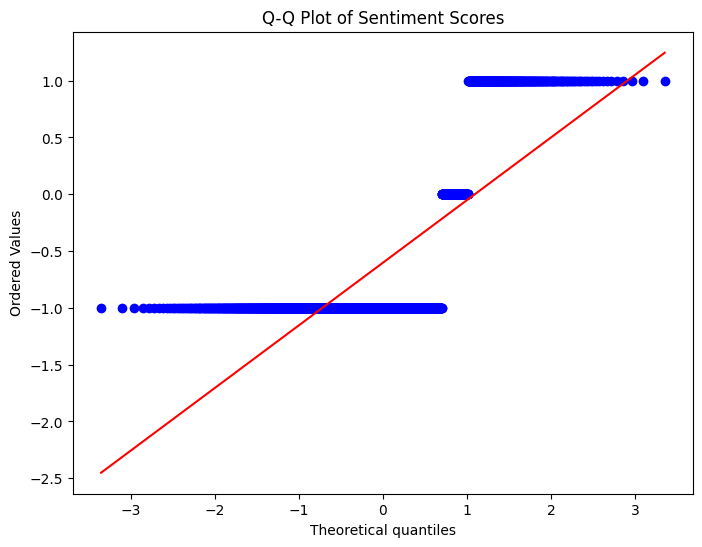

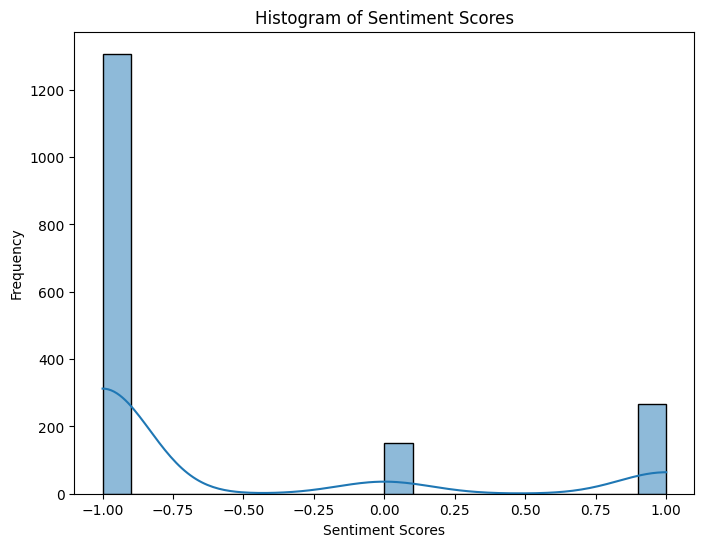

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the data from the Excel file
file_path = r'C:\Users\sriva\Desktop\FDS_F.xlsx'
df = pd.read_excel(file_path)

# Extract sentiment scores
sentiment_scores = df['sentiment']

# Shapiro-Wilk Test for normality
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject H0).")
else:
    print("Data is not normally distributed (Reject H0).")

# Q-Q Plot for normality check
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sentiment Scores')
plt.show()

# Histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_scores, kde=True, bins=20)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.show()


In [3]:
import pandas as pd
from scipy.stats import levene

# Load the data from the Excel file
file_path = r'C:\Users\sriva\Desktop\FDS_F.xlsx'
df = pd.read_excel(file_path)

# Group sentiment scores by the 'WEBSITE' column
grouped_sentiments = [group['sentiment'].values for name, group in df.groupby('WEBSITE')]

# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Interpret the p-value
if p_value > 0.05:
    print("Variances are equal (Fail to reject H0).")
else:
    print("Variances are not equal (Reject H0).")


Levene's Test Statistic: 24.5222, P-Value: 0.0000
Variances are not equal (Reject H0).


In [4]:
import pandas as pd
from scipy.stats import levene, f_oneway, kruskal, shapiro
import numpy as np

# Load the data from the Excel file
file_path = r'C:\Users\sriva\Desktop\FDS_F.xlsx'
df = pd.read_excel(file_path)

# Group sentiment scores by the 'WEBSITE' column
grouped_sentiments = [group['sentiment'].values for name, group in df.groupby('WEBSITE')]

# Check normality (Shapiro-Wilk test on the overall sentiment scores)
all_sentiments = df['sentiment'].values
_, shapiro_p_value = shapiro(all_sentiments)

# Check for equality of variances (Levene's Test)
_, levene_p_value = levene(*grouped_sentiments)

# If the data is normally distributed and variances are equal, perform ANOVA
if shapiro_p_value > 0.05 and levene_p_value > 0.05:
    f_statistic, anova_p_value = f_oneway(*grouped_sentiments)
    print(f"ANOVA F-Statistic: {f_statistic:.4f}, P-Value: {anova_p_value:.4f}")
    
    if anova_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the groups.")
else:
    # If the data is not normally distributed or variances are not equal, perform Kruskal-Wallis H Test
    h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
    print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")
    
    if kruskal_p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between the groups.")


Kruskal-Wallis H Statistic: 170.4720, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between the groups.


Pearson Correlation between Sentiment and Comment Length: 0.0323, P-Value: 0.1803
Spearman Correlation between Sentiment and Comment Length: -0.0412, P-Value: 0.0869


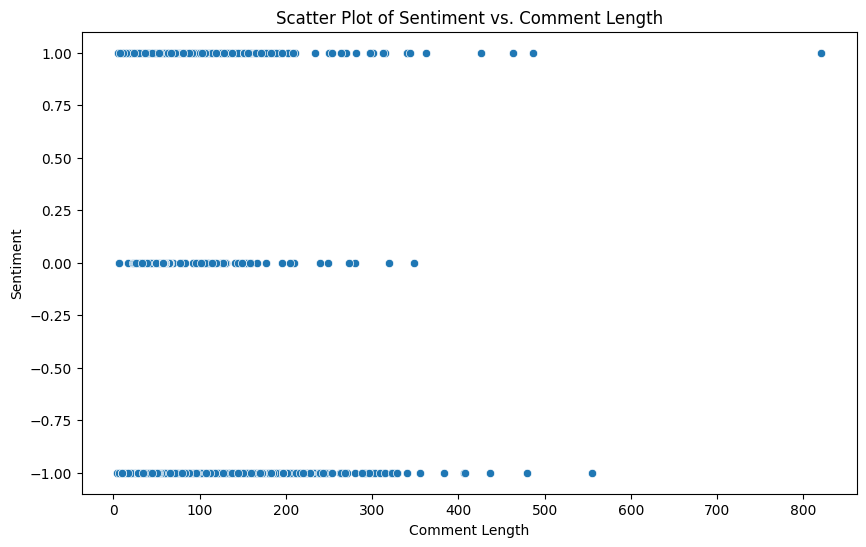

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load your data (adjust path if necessary)
file_path = r'C:\Users\sriva\Desktop\FDS_F.xlsx'  # Adjust file path
df = pd.read_excel(file_path)

# Create additional variables if needed
# Calculate the comment length (length of the 'COMMENT' column)
df['comment_length'] = df['COMMENT'].apply(len)

# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['sentiment'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['sentiment'], df['comment_length'])

# Display correlation results
print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()

# If you have timing information, ensure it’s in a datetime format (uncomment and adjust if applicable)
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Optionally create variables like hour of day or day of week from timestamps
# df['hour'] = df['timestamp'].dt.hour
# df['day_of_week'] = df['timestamp'].dt.dayofweek

# Check correlations with time (if applicable)
# pearson_corr_time, pearson_p_value_time = pearsonr(df['sentiment'], df['hour'])
# spearman_corr_time, spearman_p_value_time = spearmanr(df['sentiment'], df['hour'])

# print(f"Pearson Correlation between Sentiment and Hour of Day: {pearson_corr_time:.4f}, P-Value: {pearson_p_value_time:.4f}")
# print(f"Spearman Correlation between Sentiment and Hour of Day: {spearman_corr_time:.4f}, P-Value: {spearman_p_value_time:.4f}")

# Visualizing correlation with timing (if applicable)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='hour', y='sentiment', data=df)
# plt.title('Scatter Plot of Sentiment vs. Hour of Day')
# plt.show()


In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load the Excel file
file_path = r'C:\Users\sriva\Desktop\FDS_F.xlsx'  # Adjust path as needed
df = pd.read_excel(file_path)

# Create additional features (e.g., comment length)
df['comment_length'] = df['COMMENT'].apply(len)

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['sentiment'])

# Calculate Spearman's rank correlation coefficient and p-value
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['sentiment'])

# Print results
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Pearson p-value: {pearson_p:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'Spearman p-value: {spearman_p:.4f}')

# Interpretation
if pearson_p < 0.05:
    print("The Pearson correlation is statistically significant.")
else:
    print("The Pearson correlation is not statistically significant.")

if spearman_p < 0.05:
    print("The Spearman correlation is statistically significant.")
else:
    print("The Spearman correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.0323
Pearson p-value: 0.1803
Spearman Correlation Coefficient: -0.0412
Spearman p-value: 0.0869
The Pearson correlation is not statistically significant.
The Spearman correlation is not statistically significant.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with Pearson correlation line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='sentiment', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()

# Scatter plot with Spearman correlation line (non-parametric)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='sentiment', data=df, alpha=0.5)

# Sort values by comment length for proper line plotting in Spearman correlation
sorted_df = df.sort_values(by='comment_length')
sns.lineplot(x='comment_length', y='sentiment', data=sorted_df, color='r')

plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()


In [1]:
print ("HI")

HI
